#  EDUNET FOUNDATION - Self Practice Excercise

## Lab 1
## Problem Statement

### ""For extended data of CO2 emission ("Excercise_Data_1.csv"). 
### Company needs a multiple regression model to predict the emission generate from a newly produced car.

In [23]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.model_selection import train_test_split


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

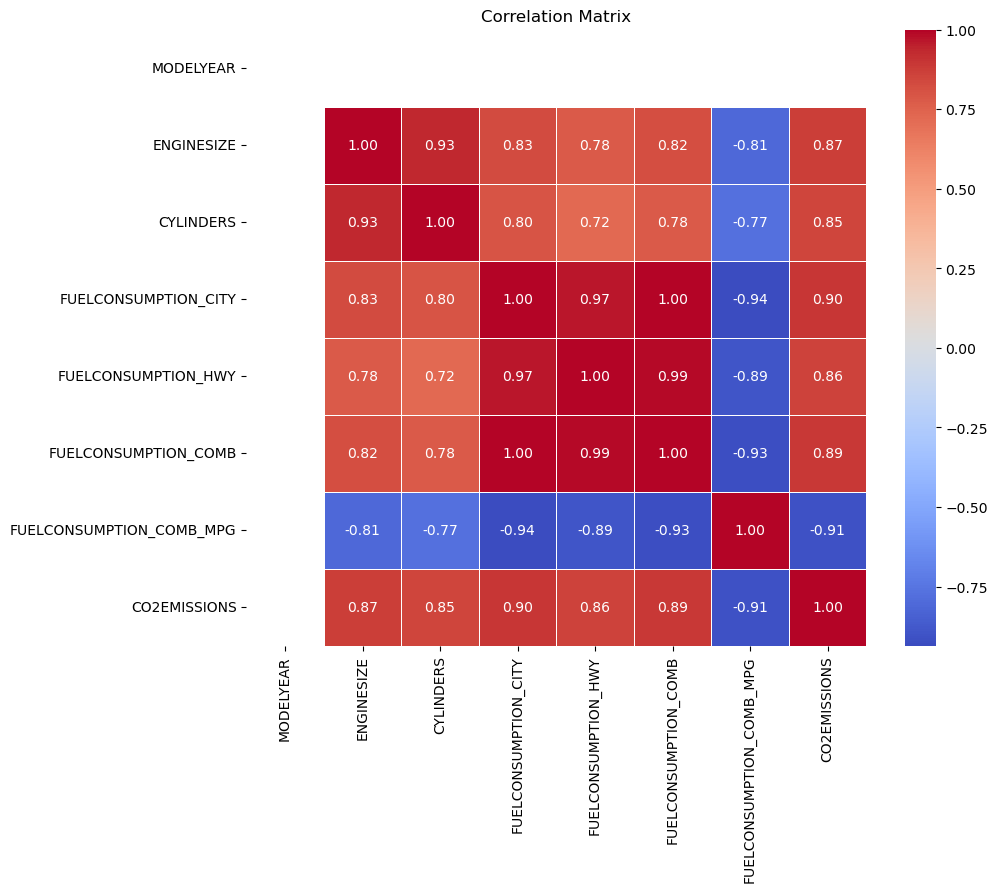

In [24]:
df = pd.read_csv("Excercise_Data_1.csv")
print(df.head())


df_numeric = df.select_dtypes(include='number').dropna()

correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [30]:
X = df[["FUELCONSUMPTION_COMB_MPG" , "FUELCONSUMPTION_COMB" , "FUELCONSUMPTION_CITY" ]]

y = df["CO2EMISSIONS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

y_pred = model.predict(X_test)

y2_pred = model2.predict(X_test)

mae2 = mean_absolute_error(y_test , y2_pred)
mse2 = mean_squared_error(y_test, y2_pred)
r2_2 = r2_score(y_test, y2_pred)
print(f"Mean Absolute Error Model 2: {mae2}")
print(f"Mean Squared Error Model 2: {mse2}")
print(f"R-squared Model 2: {r2_2}")

print("____------____----_______------")

mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error Model 1: {mae}")
print(f"Mean Squared Error Model 1: {mse}")
print(f"R-squared Model 1: {r2}")



Mean Absolute Error Model 2: 8.181932020471738
Mean Squared Error Model 2: 421.2672201705563
R-squared Model 2: 0.8981202483967288
____------____----_______------
Mean Absolute Error Model 1: 15.81940369049663
Mean Squared Error Model 1: 628.7271678965429
R-squared Model 1: 0.8479478947695134
